In [1]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import zipfile

- - - 
### Naming convention
https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/naming-convention<br>
if you want to decode product name aka:<br>
*S2A_MSIL1C_20170105T013442_N0204_R031_T53NMJ_20170105T013443.SAFE*<br>
### List of querryable attributes
https://github.com/SentinelDataHub/DataHubSystem/blob/master/addon/sentinel-2/src/main/resources/META-INF/sentinel-2.owl<br>
### To create area of interest GeoJSON
use: https://geojson.io/<br>
### Product types - level of processing
https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/product-types
- Level-0
- Level-1A
- Level-1B
- Level-1C
- Level-2A

### Usefull links
https://krstn.eu/download-Sentinel-2-images/<br>
http://www.acgeospatial.co.uk/sentinelsat_demo/<br>
https://medium.com/analytics-vidhya/two-ways-of-extracting-points-of-interest-from-sentinel-2a-data-baa124b1ed92  
  
### Plotting with geopandas  
https://stackoverflow.com/questions/38253948/geopandas-plots-as-subfigures
- - - 

In [2]:
name = '#######'
psw = '######'

In [3]:
api = SentinelAPI(name, psw, 'https://scihub.copernicus.eu/dhus', show_progressbars=True)

In [4]:
# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(read_geojson('cbudejovice.geojson'))
products = api.query(footprint,
                     date=('20200601', '20200831'),
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     cloudcoverpercentage=(0, 10))

# convert to Pandas DataFrame
products_df = api.to_dataframe(products)

# Sorting
products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'platformname'], ascending=[True, True])

In [5]:
products_df_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid
f009bbaf-daad-4443-91f3-08c55c163a97,S2B_MSIL2A_20200821T100559_N0214_R022_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-21T10:05:59.024Z, Instrument: MS...",false,2020-08-21 10:05:59.024,2020-08-21 10:05:59.024,2020-08-21 19:56:22.593,18066,...,MSI,1.09 GB,GS2B_20200821T100559_018066_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200821T100559_N0214_R022_T33UVQ_2...,f009bbaf-daad-4443-91f3-08c55c163a97
16905b6e-35f3-4f1d-9cd9-be73440517aa,S2B_MSIL2A_20200801T100559_N0214_R022_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-01T10:05:59.024Z, Instrument: MS...",false,2020-08-01 10:05:59.024,2020-08-01 10:05:59.024,2020-08-01 19:38:16.308,17780,...,MSI,1.09 GB,GS2B_20200801T100559_017780_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200801T100559_N0214_R022_T33UVQ_2...,16905b6e-35f3-4f1d-9cd9-be73440517aa
e16bde47-efba-4a9b-95ec-53c7ccf3f9ab,S2A_MSIL2A_20200806T101031_N0214_R022_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-06T10:10:31.024Z, Instrument: MS...",false,2020-08-06 10:10:31.024,2020-08-06 10:10:31.024,2020-08-06 16:50:40.388,26760,...,MSI,1.09 GB,GS2A_20200806T101031_026760_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200806T101031_N0214_R022_T33UVQ_2...,e16bde47-efba-4a9b-95ec-53c7ccf3f9ab
7c873271-e76b-492e-8150-5c464a97eeab,S2A_MSIL2A_20200816T101031_N0214_R022_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-16T10:10:31.024Z, Instrument: MS...",false,2020-08-16 10:10:31.024,2020-08-16 10:10:31.024,2020-08-16 20:52:47.769,26903,...,MSI,1.10 GB,GS2A_20200816T101031_026903_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200816T101031_N0214_R022_T33UVQ_2...,7c873271-e76b-492e-8150-5c464a97eeab
b5316217-4260-41ae-85a5-8dc7109c098d,S2A_MSIL2A_20200813T100031_N0214_R122_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-13T10:00:31.024Z, Instrument: MS...",false,2020-08-13 10:00:31.024,2020-08-13 10:00:31.024,2020-08-13 17:01:18.673,26860,...,MSI,1.07 GB,GS2A_20200813T100031_026860_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200813T100031_N0214_R122_T33UVQ_2...,b5316217-4260-41ae-85a5-8dc7109c098d
60b1c4da-56ed-41e7-b519-e19164f8d864,S2A_MSIL2A_20200826T101031_N0214_R022_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-26T10:10:31.024Z, Instrument: MS...",false,2020-08-26 10:10:31.024,2020-08-26 10:10:31.024,2020-08-26 18:55:58.067,27046,...,MSI,1.10 GB,GS2A_20200826T101031_027046_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200826T101031_N0214_R022_T33UVQ_2...,60b1c4da-56ed-41e7-b519-e19164f8d864
a508604b-8a4b-4f46-bd0f-644ca1aa016a,S2B_MSIL2A_20200808T100029_N0214_R122_T33UVQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-08-08T10:00:29.024Z, Instrument: MS...",false,2020-08-08 10:00:29.024,2020-08-08 10:00:29.024,2020-08-08 18:37:39.574,17880,...,MSI,

In [6]:
products_df_sorted.index

Index(['f009bbaf-daad-4443-91f3-08c55c163a97',
       '16905b6e-35f3-4f1d-9cd9-be73440517aa',
       'e16bde47-efba-4a9b-95ec-53c7ccf3f9ab',
       '7c873271-e76b-492e-8150-5c464a97eeab',
       'b5316217-4260-41ae-85a5-8dc7109c098d',
       '60b1c4da-56ed-41e7-b519-e19164f8d864',
       'a508604b-8a4b-4f46-bd0f-644ca1aa016a'],
      dtype='object')

In [7]:
# Define which sorted data wil be downloaded by index position
idx = 0

In [8]:
api.get_product_odata(products_df_sorted.index[idx])

{'id': 'f009bbaf-daad-4443-91f3-08c55c163a97',
 'title': 'S2B_MSIL2A_20200821T100559_N0214_R022_T33UVQ_20200821T130423',
 'size': 1174701901,
 'md5': '2CE650F21F8D0C798186A0605A56DD00',
 'date': datetime.datetime(2020, 8, 21, 10, 5, 59, 24000),
 'footprint': 'POLYGON((15.13278020217081 48.74986668059744,15.093086850093947 48.664745141803486,13.641546225080209 48.6570207750582,13.614272368185702 49.64443007346099,15.13521359578094 49.652643868751746,15.13278020217081 48.74986668059744))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f009bbaf-daad-4443-91f3-08c55c163a97')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 8, 21, 19, 57, 11, 971000),
 'Ingestion Date': datetime.datetime(2020, 8, 21, 19, 56, 22, 593000)}

In [9]:
# Quicklook on product - requires first to be looged in SciHub via browser with your creds
print(f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{products_df_sorted.index[idx]}')/Products('Quicklook')/$value")

https://scihub.copernicus.eu/dhus/odata/v1/Products('f009bbaf-daad-4443-91f3-08c55c163a97')/Products('Quicklook')/$value


In [ ]:
api.get_product_odata(products_df_sorted.index[idx], full=True)

C:\ProgramData\Anaconda3\envs\snap-qgis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


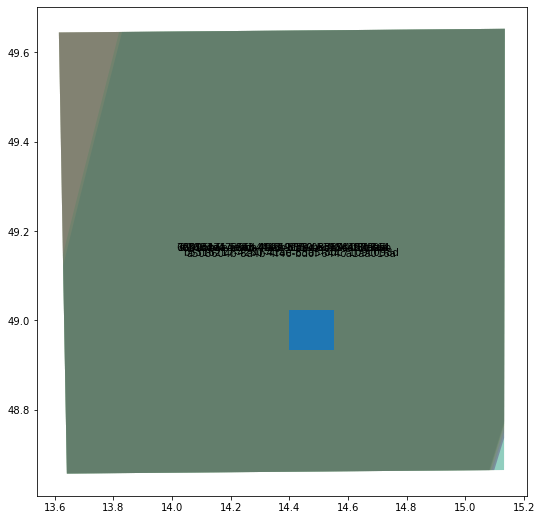

In [19]:
areas = api.to_geodataframe(products)
gdf2 = gpd.read_file('cbudejovice.geojson')
f, ax = plt.subplots(1,figsize=(12, 9))
areas.plot(ax=ax,column='uuid',cmap='viridis',alpha=0.3)
gdf2.plot(ax=ax)
areas.apply(lambda x: ax.annotate(text=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.show()

In [ ]:
# Downloading ONE or ALL

# api.download(products_df_sorted.index[idx]) # ONE

# api.download_all(products_df_sorted.index) # download sorted and reduced products ALL

In [ ]:
# Unzip only band 4 and 8 to compute NDVI
# Unziping without tree structure
with zipfile.ZipFile(f'{file}.zip') as zipp:
    for zip_info in zipp.infolist():
        if zip_info.filename.endswith('B04_10m.jp2') or zip_info.filename.endswith('B08_10m.jp2'):
            zip_info.filename = os.path.basename(zip_info.filename)
            zipp.extract(zip_info, os.path.join(os.getcwd(), 'Ndvi_2'))